In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [11]:
iris_data =load_iris()

In [12]:
X= pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
#X

In [13]:
y= pd.DataFrame(iris_data.target, columns=['class'])
#y

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
model =DecisionTreeClassifier(max_depth=4)

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
print(model.predict(X_test))
y_test

[1 2 2 0 2 2 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]


,class
82,1
134,2
114,2
42,0
109,2
57,1
1,0
70,1
25,0
84,1


In [21]:
model.score(X_test,y_test)

0.9

In [22]:
importances =model.feature_importances_

In [23]:
importances

array([0.02264808, 0.        , 0.54878049, 0.42857143])

In [24]:
import matplotlib.pyplot as plt
import numpy as np

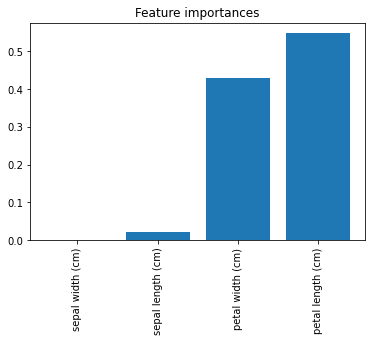

In [26]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)),importances[indices_sorted])
plt.xticks(range(len(importances)),X.columns[indices_sorted],rotation=90)
plt.show()

# 랜덤포레스트

### 하나의 트리로 숲을 만드는 거임

* 오버 피팅이 문제임.

In [28]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
iris_data =load_iris()

#데이터 셋 dataframe에 저장
X= pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y= pd.DataFrame(iris_data.target, columns=['class'])

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)
y_train=y_train.values.ravel()

In [32]:
model=RandomForestClassifier(n_estimators =100, max_depth=4)

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [34]:
model.score(X_test,y_test)

0.9

In [36]:
model.feature_importances_

array([0.09917978, 0.02170321, 0.43121058, 0.44790643])

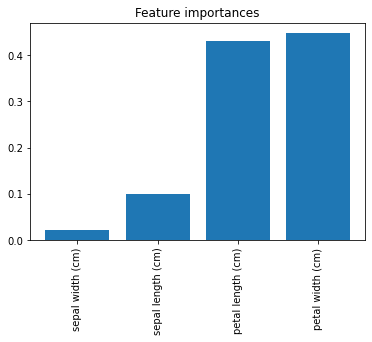

In [37]:
importances= model.feature_importances_
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)),importances[indices_sorted])
plt.xticks(range(len(importances)),X.columns[indices_sorted],rotation=90)
plt.show()

# one hot encoding

In [38]:
import pandas as pd

TITANIC_FILE_PATH="titanic.csv"

In [40]:
titanic_df=pd.read_csv(TITANIC_FILE_PATH)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_sex_embarked= titanic_df[['Sex','Embarked']]

In [42]:
one_hot_encoded_df=pd.get_dummies(titanic_sex_embarked)
one_hot_encoded_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [44]:
one_hot_encoded_df=pd.get_dummies(data=titanic_df,columns=['Sex','Embarked'])
one_hot_encoded_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
